In [1]:
import numpy as np
import pandas as pd

import FinanceDataReader as fdr

In [54]:
pd.read_csv('Summary.csv', index_col=0)

,asset_1,asset_2,asset_1_name,asset_2_name,A,B,l_max,theta,mu,sigma,x_0,x_T,d_star,b_star,t_first_d_star,t_first_b_star
0,A305720,A091180,"('KODEX 2차전지산업', 'technology,manufacturing')","('KODEX 자동차', 'technology,manufacturing')",1.0,-0.346734,3.244952,0.666663,6.172823,0.273016,0.653266,0.586412,0.442211,0.864322,230.0,inf
1,A305720,A228800,"('KODEX 2차전지산업', 'technology,manufacturing')","('TIGER 여행레저', 'retail')",1.0,-0.246231,3.187253,0.798653,5.163343,0.276495,0.753769,0.757815,0.562814,1.005025,inf,inf
2,A305720,A161510,"('KODEX 2차전지산업', 'technology,manufacturing')","('ARIRANG 고배당주', 'high-dividend')",1.0,-0.427136,3.185723,0.642710,4.684090,0.279961,0.572864,0.610483,0.391960,0.864322,inf,inf
3,A305720,A150460,"('KODEX 2차전지산업', 'technology,manufacturing')","('TIGER 중국소비테마', 'china,retail')",1.0,-0.467337,3.222262,0.539975,4.709891,0.268861,0.532663,0.463552,0.301508,0.763819,inf,inf
4,A305720,A228810,"('KODEX 2차전지산업', 'technology,manufacturing')","('TIGER 미디어컨텐츠', 'retail')",1.0,-0.356784,3.244978,0.665858,5.947345,0.266847,0.643216,0.649880,0.452261,0.854271,inf,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,A280940,A250780,"('KODEX 골드선물인버스(H)', 'commodity,inverse')","('TIGER 코스닥150선물인버스', 'inverse')",1.0,0.025126,3.816008,1.067118,6.473854,0.132688,1.025126,1.074840,0.964824,1.145729,inf,278.0
1052,A280940,A295020,"('KODEX 골드선물인버스(H)', 'commodity,inverse')","('KBSTAR 국채선물10년인버스', 'inverse,bond')",1.0,-0.246231,3.819853,0.820399,4.542172,0.131439,0.753769,0.828624,0.703518,0.914573,inf,inf
1053,A280940,A217780,"('KODEX 골드선물인버스(H)', 'commodity,inverse')","('TIGER 차이나CSI300인버스(합성)', 'china,inverse')",1.0,-0.045226,3.816469,1.005124,5.939277,0.133048,0.954774,1.012244,0.894472,1.085427,inf,278.0
1054,A280940,A225030,"('KODEX 골드선물인버스(H)', 'commodity,inverse')","('TIGER 미국S&P500선물인버스(H)', 'US,inverse')",1.0,-0.015075,3.815371,1.029001,6.263750,0.133100,0.984925,1.035963,0.924623,1.105528,inf,278.0


In [2]:
etf_candidate = pd.read_csv('etf_candidate.csv', index_col=0)
"""
# get historical data and convert to csv. just enough to do once
for i in etf_candidate['code']:
    data = fdr.DataReader(i[1:],'2019')
    data.to_csv('etf_data/'+i+'.csv')
    
df=pd.DataFrame()
for i in etf_candidate['code']:
    df1 = pd.read_csv("etf_data/{}.csv".format(i), index_col=0)['Close']
    df = pd.concat([df, df1], axis=1, join='outer')
price_df.columns = etf_candidate['code']
df.to_csv('total_etf_price.csv')
"""
price_df = pd.read_csv('total_etf_price.csv', index_col=0)

In [4]:
from datetime import datetime, timedelta

given_date = datetime.strptime(price_df.index[-1], "%Y-%m-%d")
one_year_ago = given_date - timedelta(days=365)
start_date = one_year_ago.strftime("%Y-%m-%d")

In [5]:
sliced_df = price_df[start_date:price_df.index[-1]]

In [8]:
# make candidate of etf pair
candidate = etf_candidate['code']
etf_pairs = []
for i in range(len(candidate)):
    for j in range(len(candidate)):
        if i != j:
            etf_pairs.append((candidate[i], candidate[j]))

In [55]:
pair = etf_pairs[0]

In [49]:
import matplotlib.pyplot as plt

from ou_process import get_mle_table, get_B_star

In [50]:
df_asset_1 = sliced_df[pair[0]]
df_asset_2 = sliced_df[pair[1]]

In [51]:
x_1 = df_asset_1[-200:]
x_2 = df_asset_2[-200:]
N = x_1.size
dt = 1/252

In [52]:
table1 = get_mle_table(x_1, x_2, dt)
table1

,theta,mu,sigma,mle,B
0,1.414671,31.556361,1.797663,1.245467,0.001
1,1.413509,31.518058,1.795856,1.246329,0.002
2,1.412346,31.479750,1.794049,1.247191,0.003
3,1.411184,31.441437,1.792242,1.248055,0.004
4,1.410021,31.403117,1.790435,1.248919,0.005
...,...,...,...,...,...
995,0.348253,0.816133,0.078435,-23.295684,0.996
996,0.347548,0.810897,0.077109,-24.245185,0.997
997,0.346835,0.805770,0.075796,-25.234501,0.998
998,0.346115,0.800749,0.074499,-26.264859,0.999


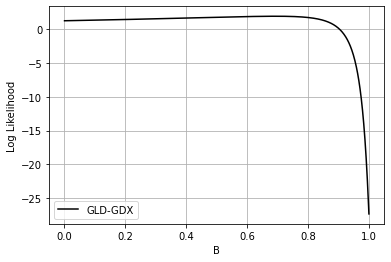

In [53]:
B = np.linspace(0.001, 1, 1000)
plt.plot(B, table1.mle, 'k', label = 'GLD-GDX')
plt.xlabel('B')
plt.ylabel('Log Likelihood')
plt.grid()
plt.legend()

In [36]:
table1

,theta,mu,sigma,mle,B
0,1.414851,31.548180,1.797860,1.245358,0.001
1,1.413869,31.501729,1.796249,1.246110,0.002
2,1.412887,31.455306,1.794639,1.246863,0.003
3,1.411905,31.408909,1.793029,1.247616,0.004
4,1.410923,31.362540,1.791419,1.248370,0.005
...,...,...,...,...,...
995,0.531670,3.281705,0.346877,1.542591,0.996
996,0.530969,3.274657,0.345860,1.537338,0.997
997,0.530267,3.267656,0.344845,1.532038,0.998
998,0.529565,3.260701,0.343835,1.526692,0.999


In [6]:
sliced_df

,A305720,A091180,A228800,A161510,A150460,A228810,A139220,A117680,A174350,A244670,...,A132030,A138910,A316300,A352560,A250780,A295020,A217780,A225030,A373530,A280940
2022-10-20,19436,15844,3571,10323,6001,5517,2556,7373,10376,7438,...,10845,5980,11800.0,10501.0,5805,56925,8510,4355,12770.0,7950
2022-10-21,19765,15688,3482,10261,5941,5462,2467,7163,10271,7316,...,10780,6060,11500.0,10401.0,5820,58005,8535,4400,12755.0,7960
2022-10-24,20155,15390,3472,10200,5981,5572,2536,7295,10295,7350,...,11005,6225,11385.0,10563.0,5635,57250,8700,4270,12860.0,7820
2022-10-25,20110,15483,3412,10149,5921,5597,2511,7173,10266,7282,...,10980,6120,11435.0,10486.0,5635,56760,8880,4210,13005.0,7785
2022-10-26,20275,15341,3377,10088,5872,5517,2471,7109,10295,7219,...,11055,6150,11940.0,10848.0,5660,56160,8830,4190,13010.0,7775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-16,24010,17745,3290,11985,6065,6010,3020,9605,11050,7965,...,12200,6290,11565.0,10390.0,4110,57415,8915,3780,12105.0,7220
2023-10-17,24195,17525,3325,11955,6135,6020,3030,9635,11065,7970,...,12235,6260,11590.0,10480.0,4065,57565,8920,3750,12105.0,7195
2023-10-18,23900,17810,3310,12095,6080,5960,3055,9695,11160,7965,...,12360,6360,11400.0,10480.0,4130,57940,8960,3760,12080.0,7125
2023-10-19,23170,17610,3235,11965,5960,5785,2995,9355,11025,7865,...,12410,6275,11160.0,10255.0,4250,58265,9105,3810,12330.0,7080
